In [1]:
# Importing Libraries
import seaborn as sns
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States']

In [8]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [12]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_skills_count

,job_skills,job_title_short,count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [118]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])  # Limiting to top 5 job titles for clarity
job_titles 

['Data Analyst', 'Data Engineer', 'Data Scientist']

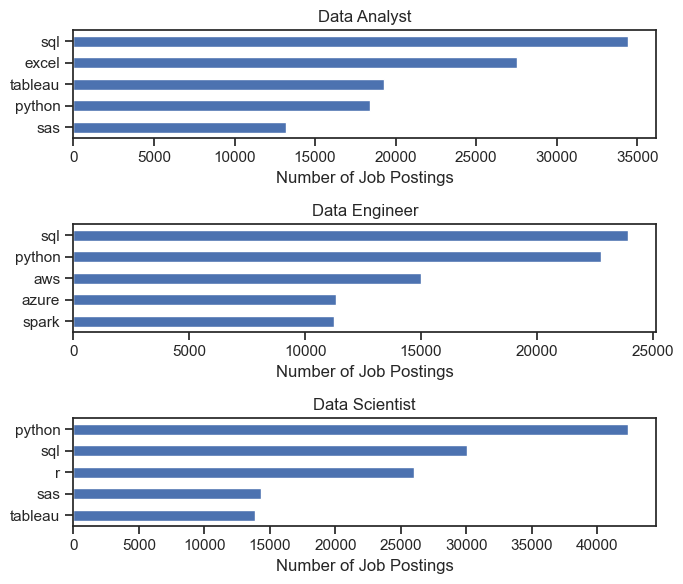

In [119]:
ig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x='job_skills', y='count', label=job_title, ax=ax[i],title = job_title)
    ax[i].set_xlabel('Number of Job Postings')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].invert_yaxis()  # To display the highest count on top 
plt.tight_layout()
plt.show()

In [78]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [89]:
df_skills_perc = pd.merge(df_job_title_count, df_skills_count, how = "left", on = 'job_title_short')
df_skills_perc['skill_perc'] = (df_skills_perc['count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc_sorted = df_skills_perc.sort_values(by='skill_perc', ascending=False)
df_skills_perc_sorted

,job_title_short,jobs_total,job_skills,count,skill_perc
667,Senior Data Scientist,12946,python,9816,75.822648
1033,Senior Data Engineer,9289,python,6692,72.042200
218,Data Scientist,58830,python,42379,72.036376
1034,Senior Data Engineer,9289,sql,6651,71.600818
1574,Machine Learning Engineer,921,python,644,69.923996
...,...,...,...,...,...
203,Data Analyst,67816,xamarin,1,0.001475
217,Data Analyst,67816,codecommit,1,0.001475
216,Data Analyst,67816,kotlin,1,0.001475
214,Data Analyst,67816,asp.net core,1,0.001475


/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_97523/4264069025.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().remove()
/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_97523/4264069025.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().remove()
/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_97523/4264069025.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().remove()


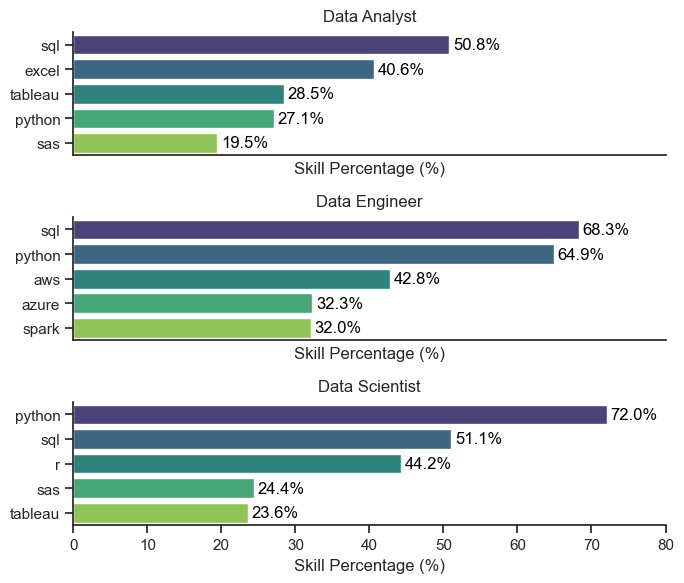

In [135]:
sns.set_theme(style="ticks")  # put this OUTSIDE the loop

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 6))

for i, job_title in enumerate(job_titles):
    df_plot = (
        df_skills_perc_sorted[df_skills_perc_sorted['job_title_short'] == job_title]
        .sort_values('skill_perc', ascending=False)
        .head(5)
    )

    sns.barplot(
        data=df_plot,
        x='skill_perc',
        y='job_skills',
        ax=ax[i],
        hue='job_skills',
        palette='viridis'
    )

    # Set subplot title manually
    ax[i].set_title(job_title, fontsize=12, pad=8)

    ax[i].set_xlabel('Skill Percentage (%)')
    ax[i].set_ylabel('')
    ax[i].legend().remove()

    # Remove top/right borders
    sns.despine(ax=ax[i])

    # Hide xticks for all but last plot
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 0.5, n, f"{v:.1f}%", color='black', va='center')
    ax[i].set_xlim(0, 80)

plt.tight_layout()
plt.show()
